In [2]:
import numpy as np 
import pandas as pd 
import seaborn  as sns 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("/home/jdiego/Documentos/MACHINE_LEARNING_DATA_SCIENCE/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X= df.drop("sales" , axis=1)

y = df["sales"]

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_convertor = PolynomialFeatures(degree=2 , include_bias=False)

polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
polynomial_convertor.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [9]:
poly_features = polynomial_convertor.transform(X)

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [12]:
test_predictions = model.predict(X_test)

In [13]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [14]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

mean_abs = mean_absolute_error(y_test , test_predictions)

mean_sqr = mean_squared_error(y_test, test_predictions)

ro_mean_sqr = np.sqrt(mean_sqr)

In [15]:
mean_abs

0.48967980448037474

In [16]:
ro_mean_sqr

0.6646431757269228

# choosing degree of model 

In [17]:
train_rmse_errors = []
test_rmse_errors = []

for d in range (1,10): 
    poly_convertor = PolynomialFeatures(degree=d , include_bias=False)

    poly_features = poly_convertor.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.3, random_state=101)

    # fit the model
    model = LinearRegression()
    model.fit(X_train , y_train)

    # storing the prediction of training and testing 
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)


    train_rmse = np.sqrt(mean_squared_error(y_train , train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test , test_pred))

    # storing the values 
    test_rmse_errors.append(test_rmse)
    train_rmse_errors.append(train_rmse)


    

In [18]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292232,
 0.43393443569020673,
 0.35170836883993467,
 0.25093429281631935,
 0.19368470454418651,
 5.421441547570718,
 0.14366040886681378,
 0.16711616874101987]

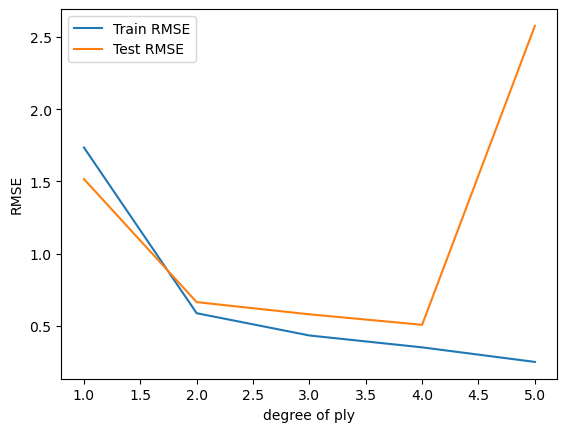

In [19]:
plt.plot(range(1,6) , train_rmse_errors[:5] , label="Train RMSE")
plt.plot(range(1,6) , test_rmse_errors[:5] , label = "Test RMSE")
plt.xlabel("degree of ply")
plt.ylabel("RMSE")
plt.legend()

In [20]:
final_poly_con = PolynomialFeatures(degree=3, include_bias=False)

final_model = LinearRegression()

full_converted_x = final_poly_con.fit_transform(X)
final_model.fit(full_converted_x , y )

LinearRegression()

In [21]:
from joblib import dump , load 

dump(final_model , " final_poly_model.joblib")

[' final_poly_model.joblib']

In [22]:
dump(final_poly_con , " final_poly_converter.joblib")

[' final_poly_converter.joblib']